Analysis of Cars on the change of prices and production with respect to the features of cars.
We will be using regression and predict the price and proportion of cars using test and train dataset.

Dataset link : https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
This dataset does not contain the headers.

So the headers for the dataset is mentioned as

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [1]:
#1st we will start form importing the libraries
import pandas as pd
import numpy as np

In [2]:
# Import clean data 
path = path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)

In [3]:
# to only get numeric data
df=df._get_numeric_data()

In [4]:
#libraries for plotting
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
print("done")

done


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
#function ploting
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close() # note if we are definig a plot inside a function then it always has to be closed..

In [6]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

In [7]:
# 1st lets see the dataset
df.head()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [8]:
#price in a sep df
y_data=df['price']

In [9]:
#drop the pric from orig df
x_data=df.drop('price',axis=1)

In [10]:
#now to split and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [11]:
#using linear regression
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']],y_train)
lre.score(x_test[['horsepower']],y_test)  # to calculte the r square value.
lre.score(x_train[['horsepower']],y_train)  # calculated using the train data..which come out to be less...

0.64495174376596842

In [12]:
#Sometimes you do not have sufficient testing data. As such, you may want to perform Cross-validation.
#Let's go over several methods that you can use for Cross-validation.

from sklearn.model_selection import cross_val_score
print("done")
Rcross=cross_val_score(lre,x_data[['horsepower']], y_data,cv=4) #cv is the number of the folds..
Rcross
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

done
The mean of the folds are 0.522009915042 and the standard deviation is 0.291183944476


In [13]:
from sklearn.model_selection import cross_val_predict
#  The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest 
#  of the folds are used as test data.

yhat=cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([ 14141.63807508,  14141.63807508,  20814.29423473,  12745.03562306,
        14762.35027598])

In [14]:
#multiple linea reg
lr=LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#prediting using train data
yhat_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 11927.70699817,  11236.71672034,   6436.91775515,  21890.22064982,
        16667.18254832])

In [16]:
#predicting using test data
yhat_test=lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 11349.16502418,   5914.48335385,  11243.76325987,   6662.03197043,
        15555.76936275])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

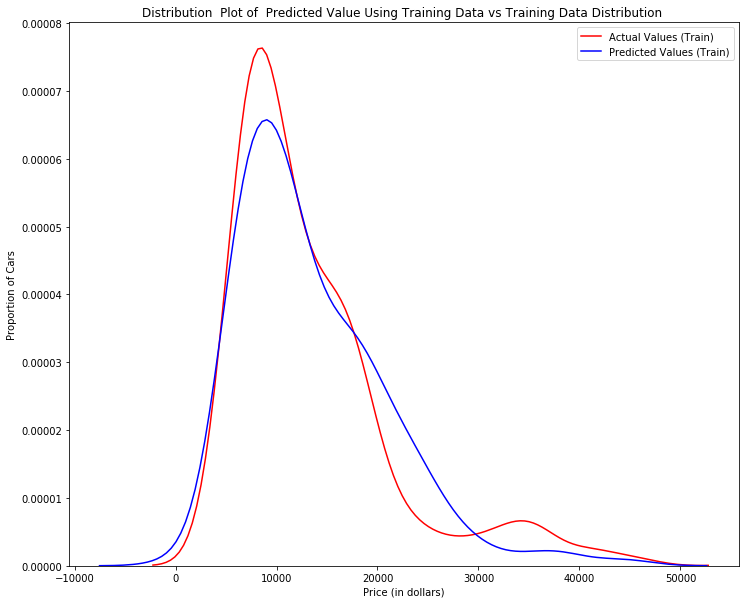

In [18]:
#distribution plot using train data
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution '
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)",Title)

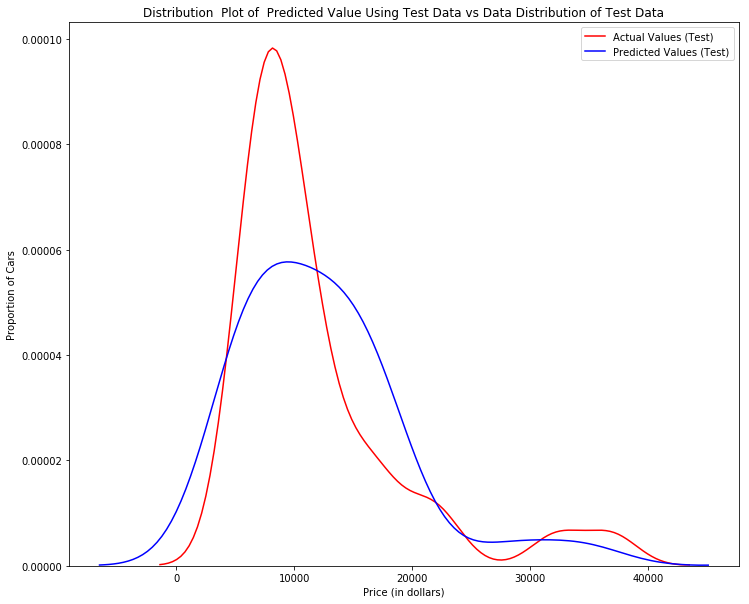

In [19]:
#distribution plot using test data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [20]:
#polynomial feature
from sklearn.preprocessing import PolynomialFeatures
print("done")

done


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
print("done")
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

done


PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

Predicted values: [  6728.73877623   7308.06173582  12213.81078747  18893.1290908 ]
True values: [  6295.  10698.  13860.  13499.]


-29.871621329672781

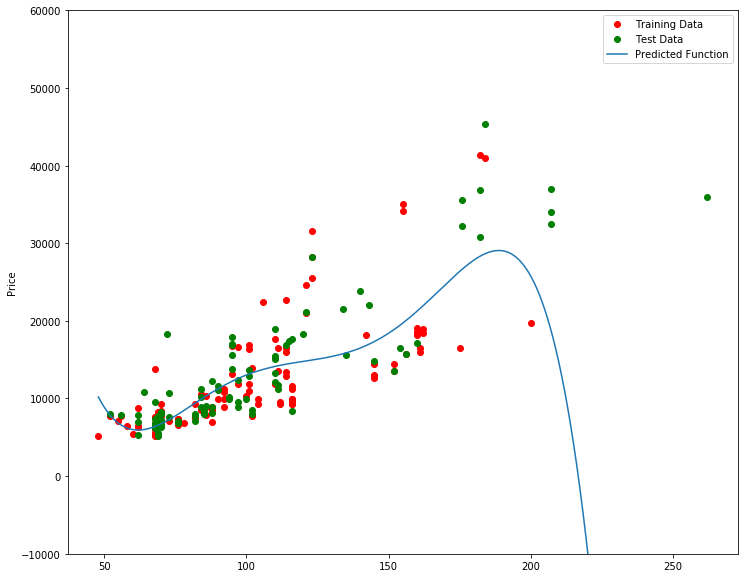

In [22]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)
yhat=poly.predict(x_test_pr )
yhat[0:5]
print("Predicted values:", yhat[0:4])
print("True values:",y_test[0:4].values)
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)
poly.score(x_train_pr, y_train)
poly.score(x_test_pr, y_test)

In [23]:
#r square vale for ranges..
Rsqu_test=[]

order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr=pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr,y_train)
    
    Rsqu_test.append(lr.score(x_test_pr,y_test))


Text(3,0.75,'Maximum R^2 ')

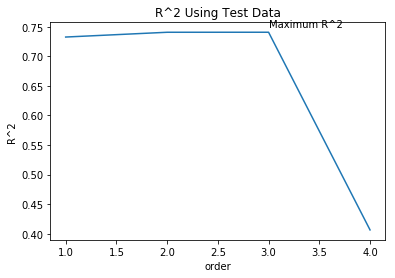

In [24]:
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    